In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# Reading/Importing the dataset into work environment 
df= pd.read_csv("/content/drive/My Drive/capstone/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [0]:
# Converting datatype of categorical variable

In [0]:
df['Month']=df['Month'].astype('category')
df['OperatingSystems']=df['OperatingSystems'].astype('category')
df['Browser']=df['Browser'].astype('category')
df['Region']=df['Region'].astype('category')
df['TrafficType']=df['TrafficType'].astype('category')
df['VisitorType']=df['VisitorType'].astype('category')

In [0]:
df['Weekend']=df['Weekend'].astype('bool')
df['Revenue']=df['Revenue'].astype('bool')

In [0]:
# Creating seperate dataframe of numerical & categorical variable
df_num=df.select_dtypes(include=['int64','float64'])
df_catg=df.select_dtypes(include=['category'])
df_bool=df.select_dtypes(include=['bool'])

In [0]:
df_bool.head()

,Weekend,Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False


In [0]:
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0


In [0]:
df_catg.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,Feb,1,1,1,1,Returning_Visitor
1,Feb,2,2,1,2,Returning_Visitor
2,Feb,4,1,9,3,Returning_Visitor
3,Feb,3,2,2,4,Returning_Visitor
4,Feb,3,3,1,4,Returning_Visitor


In [0]:
# Standard scaling of data 

In [0]:
ss=StandardScaler()
num_ss=ss.fit_transform(df_num)

In [0]:
df_num_ss=pd.DataFrame(data=num_ss,columns=df_num.columns)

In [0]:
df_num_ss.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
df_catg_dummy=df_catg.apply(le.fit_transform)
df_catg_dummy.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,2,0,0,0,0,2
1,2,1,1,0,1,2
2,2,3,0,8,2,2
3,2,2,1,1,3,2
4,2,2,2,0,3,2


In [0]:
df_bool["Weekend"]=df_bool["Weekend"].map({False:0,True:1})
df_bool["Revenue"]=df_bool["Revenue"].map({False:0,True:1})

In [0]:
df_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 2 columns):
Weekend    12330 non-null int64
Revenue    12330 non-null int64
dtypes: int64(2)
memory usage: 192.7 KB


In [0]:
df_ss=pd.concat([df_num_ss,df_catg_dummy],axis=1)
df_ss=pd.concat([df_ss,df_bool],axis=1)
df_ss.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,0,0,0,0,2,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,1,1,0,1,2,0,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,3,0,8,2,2,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,2,1,1,3,2,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,2,2,0,3,2,1,0


In [0]:
# Seperating Independent and Target Variable ( standardized data)
X=df_ss.drop('Revenue',axis=1)
y=df_ss['Revenue']

In [0]:
# Before oversampling , Target Variable is highly imbalanced 
np.bincount(y)

array([10422,  1908])

#Model building

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
lr= LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
LR_y_pred = lr.predict(X_test)

lr_test_accuracy=metrics.accuracy_score(y_test,LR_y_pred)
lr_train_accuracy=lr.score(X_train, y_train)
lr_test_precision = metrics.precision_score(y_test,LR_y_pred)

print("Test Accuracy for Logistic Regression:\t",lr_test_accuracy)
print()
print("Training Accuracy for Logistic Regression:\t",lr_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,LR_y_pred))
print()
print("\nPrecision Score:\n\n",lr_test_precision)

Test Accuracy for Logistic Regression:	 0.8875371722087051

Training Accuracy for Logistic Regression:	 0.8830958174023867

Confusion Matirx:

 [[3089   66]
 [ 350  194]]


Precision Score:

 0.7461538461538462


In [0]:
Report_lr=metrics.classification_report(y_test,LR_y_pred)
print(Report_lr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3155
           1       0.75      0.36      0.48       544

    accuracy                           0.89      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.88      0.89      0.87      3699



In [0]:
from sklearn import metrics
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr,label='ROC curve(area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positve rate')
    plt.ylabel('True positve rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr,tpr,thresholds

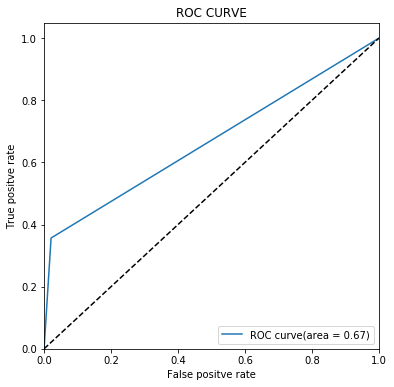

(array([0.        , 0.02091918, 1.        ]),
 array([0.        , 0.35661765, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,LR_y_pred)

In [0]:
# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
DT= DecisionTreeClassifier(random_state=0)  
DT.fit(X_train, y_train)

DT_y_pred = DT.predict(X_test) 
DT_test_accuracy=metrics.accuracy_score(y_test,DT_y_pred)
DT_train_accuracy=DT.score(X_train, y_train)
DT_test_precision = metrics.precision_score(y_test,DT_y_pred)


print("Test Accuracy for Decision Tree model:\n",DT_test_accuracy)
print()
print("Training Accuracy for Decision Tree model:\n",DT_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,DT_y_pred))
print()
print("\nPrecision Score:\n\n",DT_test_precision)

Test Accuracy for Decision Tree model:
 0.8634766153014328

Training Accuracy for Decision Tree model:
 1.0

Confusion Matirx:

 [[2902  253]
 [ 252  292]]


Precision Score:

 0.5357798165137615


In [0]:
Report_DT=metrics.classification_report(y_test,DT_y_pred)
print(Report_DT)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3155
           1       0.54      0.54      0.54       544

    accuracy                           0.86      3699
   macro avg       0.73      0.73      0.73      3699
weighted avg       0.86      0.86      0.86      3699



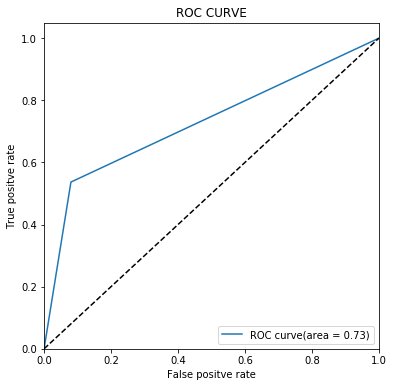

(array([0.        , 0.08019017, 1.        ]),
 array([0.        , 0.53676471, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,DT_y_pred)

In [0]:
# Random forest model

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc= RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

rfc_y_pred = rfc.predict(X_test) 
rfc_test_accuracy=metrics.accuracy_score(y_test,rfc_y_pred)
rfc_train_accuracy=rfc.score(X_train, y_train)
rfc_test_precision = metrics.precision_score(y_test,rfc_y_pred)

print("Test Accuracy for Random forest model:\n",rfc_test_accuracy)
print()
print("Training Accuracy forRandom forest model:\n",rfc_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,rfc_y_pred))
print()
print("\nPrecision Score:\n\n",rfc_test_precision)

Test Accuracy for Random forest model:
 0.8918626655852934

Training Accuracy forRandom forest model:
 0.9909628084810567

Confusion Matirx:

 [[3023  132]
 [ 268  276]]


Precision Score:

 0.6764705882352942


In [0]:
Report_rfc=metrics.classification_report(y_test,rfc_y_pred)
print(Report_rfc)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3155
           1       0.68      0.51      0.58       544

    accuracy                           0.89      3699
   macro avg       0.80      0.73      0.76      3699
weighted avg       0.88      0.89      0.89      3699



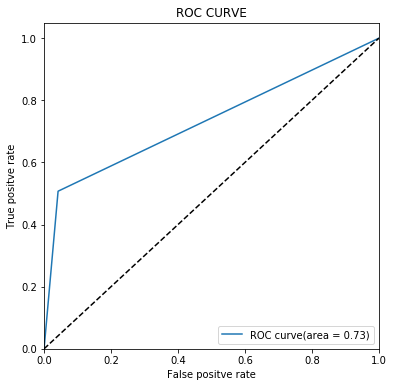

(array([0.        , 0.04183835, 1.        ]),
 array([0.        , 0.50735294, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,rfc_y_pred)

In [0]:
# Light Gradient Boosting

In [0]:
from lightgbm import LGBMClassifier

In [0]:
lgbm= LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)

lgbm_y_pred = lgbm.predict(X_test) 
lgbm_test_accuracy=metrics.accuracy_score(y_test,lgbm_y_pred)
lgbm_train_accuracy=lgbm.score(X_train, y_train)
lgbm_test_precision = metrics.precision_score(y_test,lgbm_y_pred)

print("Test Accuracy for Light Gradient boosting model:\n",lgbm_test_accuracy)
print()
print("Training Accuracy forLight Gradient boosting model:\n",lgbm_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,lgbm_y_pred))
print()
print("\nPrecision Score:\n\n",lgbm_test_precision)

Test Accuracy for Light Gradient boosting model:
 0.8986212489862125

Training Accuracy forLight Gradient boosting model:
 0.9667477696674777

Confusion Matirx:

 [[3016  139]
 [ 236  308]]


Precision Score:

 0.6890380313199105


In [0]:
Report_lgbm=metrics.classification_report(y_test,lgbm_y_pred)
print(Report_lgbm)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3155
           1       0.69      0.57      0.62       544

    accuracy                           0.90      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



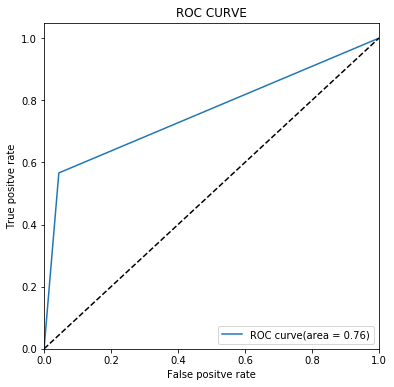

(array([0.        , 0.04405705, 1.        ]),
 array([0.        , 0.56617647, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,lgbm_y_pred)

In [0]:
# Checking accuracy

In [0]:
accuracy_table=pd.DataFrame(columns=['Train_accuracy','Test_accuracy','Test_Precision'],index=['LR','DT','RF','LGBM','Bag_LR','Bag_DT','Boost_LR','Boost_DT'])

In [0]:
accuracy_table['Train_accuracy']=[lr_train_accuracy,DT_train_accuracy,rfc_train_accuracy,lgbm_train_accuracy,bag_lr_train_accuracy,bag_DT_train_accuracy,boost_lr_train_accuracy,boost_DT_train_accuracy]

In [0]:
accuracy_table['Test_accuracy']=[lr_test_accuracy,DT_test_accuracy,rfc_test_accuracy,lgbm_test_accuracy,bag_lr_test_accuracy,bag_DT_test_accuracy,boost_lr_test_accuracy,boost_DT_test_accuracy]

In [0]:
accuracy_table['Test_Precision']=[lr_test_precision,DT_test_precision,rfc_test_precision,lgbm_test_precision,bag_lr_test_precision,bag_DT_test_precision,boost_lr_test_precision,boost_DT_test_precision]

In [0]:
accuracy_table.sort_values(by="Test_Precision",ascending=False)

,Train_accuracy,Test_accuracy,Test_Precision
Boost_LR,0.869192,0.874020,0.774648
Bag_LR,0.883559,0.887808,0.747126
LR,0.883096,0.887537,0.746154
LGBM,0.966748,0.898621,0.689038
Bag_DT,0.883559,0.897540,0.679739
RF,0.990963,0.891863,0.676471
DT,1.000000,0.863477,0.535780
Boost_DT,0.869192,0.862666,0.533582


In [0]:
# BASE MODEL 

lr= LogisticRegression(random_state=0)
DT= DecisionTreeClassifier(random_state=0)  
rfc= RandomForestClassifier(random_state=0)
lgbm= LGBMClassifier(random_state=0)

In [0]:
# BAGGED MODEL 
from sklearn.ensemble import BaggingClassifier

bag_lr= BaggingClassifier(base_estimator=lr,random_state=0,)
bag_DT= BaggingClassifier(base_estimator=DT,random_state=0)


In [0]:
# Finding n-estimator for all bagged model
from sklearn.model_selection import GridSearchCV,KFold

grid = {'n_estimators': np.arange(1,50,5)}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
BC_grid = GridSearchCV(bag_DT, grid, cv=kf,scoring='roc_auc',n_jobs=-1)
BC_grid.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_s

In [0]:
print("Best params : {}".format(BC_grid.best_params_)) 
print("Best score: {}".format(BC_grid.best_score_))

Best params : {'n_estimators': 46}
Best score: 0.924001533997428


In [0]:
# BAGGED MODEL after tuning
bag_lr= BaggingClassifier(base_estimator=lr,random_state=0,n_estimators=46)
bag_DT= BaggingClassifier(base_estimator=DT,random_state=0,n_estimators=46)

In [0]:
# Boosted MODEL 
from sklearn.ensemble import AdaBoostClassifier

boost_lr= AdaBoostClassifier(base_estimator=lr,random_state=0)
boost_DT= AdaBoostClassifier(base_estimator=DT,random_state=0)  


In [0]:
# Finding n-estimator for all boost model
from sklearn.model_selection import GridSearchCV,KFold

grid = {'n_estimators': np.arange(1,50,5)}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
BC_grid = GridSearchCV(boost_DT, grid, cv=kf,scoring='roc_auc',n_jobs=-1)
BC_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                     

In [0]:
print("Best params : {}".format(BC_grid.best_params_)) 
print("Best score: {}".format(BC_grid.best_score_))

Best params : {'n_estimators': 1}
Best score: 0.753466587239001


In [0]:
boost_lr= AdaBoostClassifier(base_estimator=lr,random_state=0,n_estimators=46)
boost_DT= AdaBoostClassifier(base_estimator=DT,random_state=0,n_estimators=1)  

In [0]:
# All model

# Base Model

lr= LogisticRegression(random_state=0)  
DT= DecisionTreeClassifier(random_state=0)  
rfc= RandomForestClassifier(random_state=0)
lgbm= LGBMClassifier(random_state=0)

# Bagged Model after tuning
bag_lr= BaggingClassifier(base_estimator=lr,random_state=0,n_estimators=46)  
bag_DT= BaggingClassifier(base_estimator=DT,random_state=0,n_estimators=46)

# Boosted Model after tuning
boost_lr= AdaBoostClassifier(base_estimator=lr,random_state=0,n_estimators=46)
boost_DT= AdaBoostClassifier(base_estimator=DT,random_state=0,n_estimators=1)  


# Bagged LR

In [0]:
bag_lr= BaggingClassifier(base_estimator=lr,random_state=0,n_estimators=46)  
bag_lr.fit(X_train, y_train)

bag_lr_y_pred = bag_lr.predict(X_test) 
bag_lr_test_accuracy=metrics.accuracy_score(y_test,bag_lr_y_pred)
bag_lr_train_accuracy=bag_lr.score(X_train, y_train)
bag_lr_test_precision = metrics.precision_score(y_test,bag_lr_y_pred)

print("Test Accuracy for Bagged LR model:\n",bag_lr_test_accuracy)
print()
print("Training Accuracy for Bagged LR model model:\n",bag_lr_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,bag_lr_y_pred))
print()
print("\nPrecision Score:\n\n",bag_lr_test_precision)

Test Accuracy for Bagged LR model:
 0.8878075155447418

Training Accuracy for Bagged LR model model:
 0.883559263121307

Confusion Matirx:

 [[3089   66]
 [ 349  195]]


Precision Score:

 0.7471264367816092


In [0]:
Report_bag_lr=metrics.classification_report(y_test,bag_lr_y_pred)
print(Report_bag_lr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3155
           1       0.75      0.36      0.48       544

    accuracy                           0.89      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.88      0.89      0.87      3699



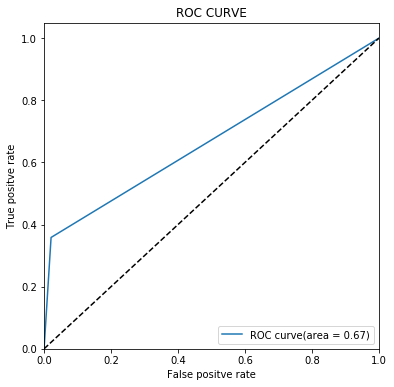

(array([0.        , 0.02091918, 1.        ]),
 array([0.        , 0.35845588, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,bag_lr_y_pred)

# Bagged Decision Tree

In [0]:
bag_DT= BaggingClassifier(base_estimator=DT,random_state=0,n_estimators=46)
bag_DT.fit(X_train, y_train)

bag_DT_y_pred = bag_DT.predict(X_test) 
bag_DT_test_accuracy=metrics.accuracy_score(y_test,bag_DT_y_pred)
bag_DT_train_accuracy=bag_lr.score(X_train, y_train)
bag_DT_test_precision = metrics.precision_score(y_test,bag_DT_y_pred)

print("Test Accuracy for Bagged DT model:\n",bag_DT_test_accuracy)
print()
print("Training Accuracy for Bagged DT model model:\n",bag_DT_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,bag_DT_y_pred))
print()
print("\nPrecision Score:\n\n",bag_DT_test_precision)

Test Accuracy for Bagged DT model:
 0.8975398756420654

Training Accuracy for Bagged DT model model:
 0.883559263121307

Confusion Matirx:

 [[3008  147]
 [ 232  312]]


Precision Score:

 0.6797385620915033


In [0]:
Report_bag_DT=metrics.classification_report(y_test,bag_DT_y_pred)
print(Report_bag_DT)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3155
           1       0.68      0.57      0.62       544

    accuracy                           0.90      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



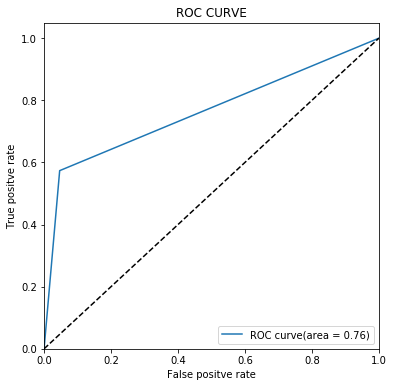

(array([0.        , 0.04659271, 1.        ]),
 array([0.        , 0.57352941, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,bag_DT_y_pred)

# Boosted LR

In [0]:
boost_lr= AdaBoostClassifier(base_estimator=lr,random_state=0,n_estimators=46)
boost_lr.fit(X_train, y_train)

boost_lr_y_pred = boost_lr.predict(X_test) 
boost_lr_test_accuracy=metrics.accuracy_score(y_test,boost_lr_y_pred)
boost_lr_train_accuracy=boost_lr.score(X_train, y_train)
boost_lr_test_precision = metrics.precision_score(y_test,boost_lr_y_pred)

print("Test Accuracy for Boosted LR model:\n",boost_lr_test_accuracy)
print()
print("Training Accuracy for Boosted LR model model:\n",boost_lr_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,boost_lr_y_pred))
print()
print("\nPrecision Score:\n\n",boost_lr_test_precision)


Test Accuracy for Boosted LR model:
 0.8740200054068668

Training Accuracy for Boosted LR model model:
 0.8691924458347816

Confusion Matirx:

 [[3123   32]
 [ 434  110]]


Precision Score:

 0.7746478873239436


In [0]:
Report_boost_lr=metrics.classification_report(y_test,boost_lr_y_pred)
print(Report_boost_lr)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3155
           1       0.77      0.20      0.32       544

    accuracy                           0.87      3699
   macro avg       0.83      0.60      0.63      3699
weighted avg       0.86      0.87      0.84      3699



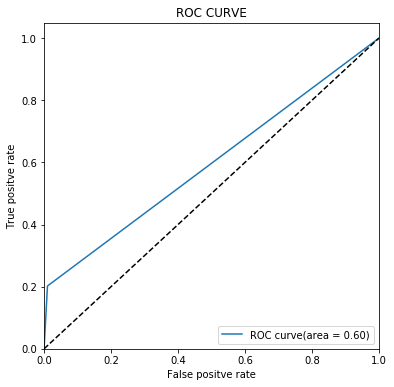

(array([0.        , 0.01014263, 1.        ]),
 array([0.        , 0.20220588, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,boost_lr_y_pred)

# Boosted DT

In [0]:
boost_DT= AdaBoostClassifier(base_estimator=DT,random_state=0,n_estimators=1) 
boost_DT.fit(X_train, y_train)

boost_DT_y_pred = boost_DT.predict(X_test) 
boost_DT_test_accuracy=metrics.accuracy_score(y_test,boost_DT_y_pred)
boost_DT_train_accuracy=boost_lr.score(X_train, y_train)
boost_DT_test_precision = metrics.precision_score(y_test,boost_DT_y_pred)

print("Test Accuracy for Bagged DT model:\n",boost_DT_test_accuracy)
print()
print("Training Accuracy for Bagged DT model model:\n",boost_DT_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,boost_DT_y_pred))
print()
print("\nPrecision Score:\n\n",boost_DT_test_precision) 


Test Accuracy for Bagged DT model:
 0.8626655852933225

Training Accuracy for Bagged DT model model:
 0.8691924458347816

Confusion Matirx:

 [[2905  250]
 [ 258  286]]


Precision Score:

 0.5335820895522388


In [0]:
Report_boost_DT=metrics.classification_report(y_test,boost_DT_y_pred)
print(Report_boost_DT)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3155
           1       0.53      0.53      0.53       544

    accuracy                           0.86      3699
   macro avg       0.73      0.72      0.72      3699
weighted avg       0.86      0.86      0.86      3699



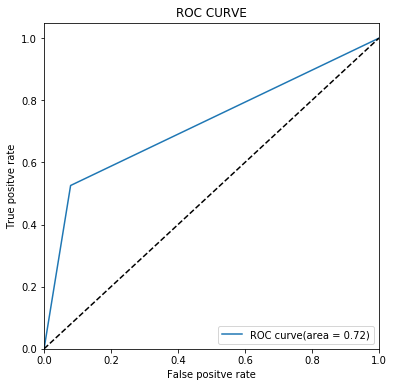

(array([0.       , 0.0792393, 1.       ]),
 array([0.        , 0.52573529, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,boost_DT_y_pred)

In [0]:
all_models=['lr','DT','rfc','lgbm','bag_lr','bag_DT','boost_lr','boost_DT']

In [0]:
models_err=pd.DataFrame({'Var':np.NaN,'Bias':np.NaN},index=all_models)

In [0]:
for model,names in zip([lr,DT,rfc,lgbm,bag_lr,bag_DT,boost_lr,boost_DT],all_models):
    accuracy = []
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_predict)
    accuracy.append(round(acc*100,2))
    print("Accuracy:" ,accuracy,names)

Accuracy: [88.75] lr
Accuracy: [86.35] DT
Accuracy: [89.19] rfc
Accuracy: [89.86] lgbm
Accuracy: [88.78] bag_lr
Accuracy: [89.75] bag_DT
Accuracy: [87.4] boost_lr
Accuracy: [86.27] boost_DT


In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model, name in zip([lr,DT,rfc,lgbm,bag_lr,bag_DT,boost_lr,boost_DT], 
      ['lr','DT','rfc','lgbm','bag_lr','bag_DT','boost_lr','boost_DT']):
    roc_auc=[]
    for train,test in kf.split(X,y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=y.iloc[train],y.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        fpr,tpr, _ = roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr, tpr))
    print("AUC scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(roc_auc),
                                    np.var(roc_auc,ddof=1), name ))   

AUC scores: 0.68 (+/- 0.00021) [lr]
AUC scores: 0.74 (+/- 0.00024) [DT]
AUC scores: 0.74 (+/- 0.00020) [rfc]
AUC scores: 0.78 (+/- 0.00008) [lgbm]
AUC scores: 0.68 (+/- 0.00021) [bag_lr]
AUC scores: 0.77 (+/- 0.00009) [bag_DT]
AUC scores: 0.61 (+/- 0.00014) [boost_lr]
AUC scores: 0.74 (+/- 0.00021) [boost_DT]
